In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Função para tratar os dados externos
def preparar_externa(df, nome_coluna):
    # Converte a coluna de data para o formato correto
    df["Data"] = pd.to_datetime(df["Data"], format="%d.%m.%Y")
    df = df.sort_values("Data")
    # Converte os valores que estão com vírgula para float (número decimal)
    df[nome_coluna] = df["Último"].astype(str).str.replace(",", ".").astype(float)
    # Retorna apenas a data e o valor tratado
    df['Var'] = df["Var%"].str.replace('%', '').str.replace(',', '.').astype(float)
    return df

In [ ]:
# Ler base de dados
ibovespa = pd.read_csv('Ibovespa_2022_2025.csv', sep = ',')
ibovespa.tail()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
769,22.11.2022,109.037,109.750,110.224,107.867,"15,06M","-0,65%"
770,21.11.2022,109.748,108.868,110.235,107.957,"16,65M","0,81%"
771,18.11.2022,108.870,109.706,111.585,108.512,"18,77M","-0,76%"
772,17.11.2022,109.703,110.241,110.242,107.245,"23,12M","-0,49%"
773,16.11.2022,110.243,113.166,113.473,109.512,"18,35M","-2,58%"


In [ ]:
# Carregar os dados do petróleo Brent
petroleo = pd.read_csv('Petroleo_brent_2022_2025.csv', sep = ',')
print(petroleo)
petroleo = preparar_externa(petroleo, "Brent")
petroleo = petroleo[["Data", "Brent"]]
print(petroleo)
petroleo.info()

           Data Último Abertura Máxima Mínima     Vol.    Var%
0    17.12.2025  59,68    59,30  60,74  59,25  346,61K   1,29%
1    16.12.2025  58,92    60,39  60,40  58,72  356,77K  -2,71%
2    15.12.2025  60,56    61,09  61,50  60,13  288,63K  -0,92%
3    12.12.2025  61,12    61,60  61,86  60,81  246,06K  -0,26%
4    11.12.2025  61,28    62,42  62,63  60,77  328,70K  -1,49%
..          ...    ...      ...    ...    ...      ...     ...
792  22.11.2022  88,36    87,76  89,90  87,35  190,85K   1,04%
793  21.11.2022  87,45    87,74  87,98  82,31  354,60K  -0,19%
794  18.11.2022  87,62    90,10  90,63  85,80  379,66K  -2,41%
795  17.11.2022  89,78    92,73  92,91  89,53  313,53K  -3,32%
796  16.11.2022  92,86    94,11  94,79  91,67  257,62K  -1,07%

[797 rows x 7 columns]
          Data  Brent
796 2022-11-16  92.86
795 2022-11-17  89.78
794 2022-11-18  87.62
793 2022-11-21  87.45
792 2022-11-22  88.36
..         ...    ...
4   2025-12-11  61.28
3   2025-12-12  61.12
2   2025-12-15  60.56


In [ ]:
# Carregar os dados do dólar (USD/BRL)
dolar = pd.read_csv('Dolar_2022_2025.csv', sep = ',')
print(dolar)
dolar = preparar_externa(dolar, "Dolar")
dolar = dolar[["Data", "Dolar"]]
print(dolar)
dolar.info()

           Data  Último Abertura  Máxima  Mínima     Vol.    Var%
0    17.12.2025  5,5205   5,4683  5,5315  5,4683      NaN   0,20%
1    16.12.2025  5,5093   5,4151  5,5093  5,4148      NaN   1,75%
2    15.12.2025  5,4148   5,4187  5,4262  5,3810      NaN  -0,08%
3    12.12.2025  5,4190   5,4058  5,4265  5,3795      NaN   0,20%
4    11.12.2025  5,4084   5,4718  5,4784  5,3952      NaN  -1,18%
..          ...     ...      ...     ...     ...      ...     ...
801  22.11.2022  5,3586   5,3203  5,4005  5,2794  174,86K   0,73%
802  21.11.2022  5,3200   5,3832  5,3836  5,2976  177,13K  -1,16%
803  18.11.2022  5,3827   5,4236  5,4236  5,3253  156,99K  -0,74%
804  17.11.2022  5,4231   5,4003  5,5307  5,3866  167,68K   0,43%
805  16.11.2022  5,3998   5,3330  5,4057  5,2868  146,98K   1,26%

[806 rows x 7 columns]
          Data   Dolar
805 2022-11-16  5.3998
804 2022-11-17  5.4231
803 2022-11-18  5.3827
802 2022-11-21  5.3200
801 2022-11-22  5.3586
..         ...     ...
4   2025-12-11  5.4084


In [ ]:
# Carregar os dados Selic
selic = pd.read_csv('Selic_2022_2025.csv', sep = ',')
print(selic)
selic = preparar_externa(selic, "Selic")
selic = selic[["Data", "Selic"]]
print(selic)
selic.info()

           Data Último Abertura Máxima Mínima     Vol.    Var%
0    17.12.2025  2,580    2,580  2,580  2,580    0,10K   0,00%
1    16.12.2025  2,580    2,540  2,580  2,540   22,60K   0,00%
2    15.12.2025  2,580    2,580  2,580  2,560   11,60K  -0,77%
3    12.12.2025  2,600    2,640  2,640  2,600   11,70K  -2,26%
4    11.12.2025  2,660    2,660  2,660  2,660    0,20K   0,00%
..          ...    ...      ...    ...    ...      ...     ...
742  22.11.2022  2,710    2,729  2,748  2,710  753,92K  -0,71%
743  21.11.2022  2,729    2,748  2,748  2,729    1,23M  -1,40%
744  18.11.2022  2,768    2,806  2,826  2,729    1,76M  -1,38%
745  17.11.2022  2,806    2,787  2,845  2,787  588,38K   0,69%
746  16.11.2022  2,787    2,806  2,826  2,787  435,65K  -0,69%

[747 rows x 7 columns]
          Data  Selic
746 2022-11-16  2.787
745 2022-11-17  2.806
744 2022-11-18  2.768
743 2022-11-21  2.729
742 2022-11-22  2.710
..         ...    ...
4   2025-12-11  2.660
3   2025-12-12  2.600
2   2025-12-15  2.580


In [ ]:
# Carregar dados Vale
vale = pd.read_csv("Vale3_2022_2025.csv", sep = ",")
print(vale)
vale = preparar_externa(vale, "Vale")
vale = vale[["Data", "Vale"]]
print(vale)
vale.info()

           Data Último Abertura Máxima Mínima    Vol.    Var%
0    17.12.2025  70,17    69,64  70,77  69,44  29,38M   1,27%
1    16.12.2025  69,29    69,33  70,03  69,26  21,95M   0,38%
2    15.12.2025  69,03    68,65  69,39  68,50  16,84M   0,61%
3    12.12.2025  68,61    67,75  68,98  67,72  36,48M   0,28%
4    11.12.2025  68,42    67,22  68,77  66,96  25,69M   1,32%
..          ...    ...      ...    ...    ...     ...     ...
774  22.11.2022  67,96    67,80  69,08  67,32  27,11M   0,28%
775  21.11.2022  67,77    67,08  68,00  66,38  27,75M  -1,13%
776  18.11.2022  68,55    71,53  71,65  68,43  44,19M  -2,73%
777  17.11.2022  70,47    68,58  70,63  68,47  31,79M   0,80%
778  16.11.2022  69,91    70,66  71,89  69,15  32,94M  -1,04%

[779 rows x 7 columns]
          Data   Vale
778 2022-11-16  69.91
777 2022-11-17  70.47
776 2022-11-18  68.55
775 2022-11-21  67.77
774 2022-11-22  67.96
..         ...    ...
4   2025-12-11  68.42
3   2025-12-12  68.61
2   2025-12-15  69.03
1   2025-12-

In [ ]:
# Carregar dados S&P
sp = pd.read_csv("SeP500_2022_2025.csv", sep = ",")
print(sp)
sp['SeP'] = sp['Último'].astype(str).str.replace(".", "" ).str.replace(",", "." ).astype(float)
sp["Data"] = pd.to_datetime(sp['Data'], format = '%d.%m.%Y')
sp = sp.sort_values('Data')
sp = sp[['Data', 'SeP']]
print(sp)
sp.info()

           Data Último Abertura Máxima Mínima    Vol.    Var%
0    17.12.2025  81,00    81,00  81,00  81,00   2,90K  -0,53%
1    16.12.2025  81,43    81,43  84,00  78,50   4,24K  -2,98%
2    15.12.2025  83,93    83,93  84,19  79,00   4,25K   1,63%
3    12.12.2025  82,58    82,58  84,10  78,00   4,67K   5,98%
4    11.12.2025  77,92    77,92  84,48  77,00  10,35K  -0,78%
..          ...    ...      ...    ...    ...     ...     ...
763  22.11.2022  68,54    68,54  70,00  68,50  18,49K   0,03%
764  21.11.2022  68,52    68,52  68,55  68,50  12,62K  -1,61%
765  18.11.2022  69,64    69,64  70,00  68,50  20,48K  -0,74%
766  17.11.2022  70,16    70,16  71,00  69,00   0,66K  -0,30%
767  16.11.2022  70,37    70,37  71,00  68,01   4,24K   0,16%

[768 rows x 7 columns]
          Data    SeP
767 2022-11-16  70.37
766 2022-11-17  70.16
765 2022-11-18  69.64
764 2022-11-21  68.52
763 2022-11-22  68.54
..         ...    ...
4   2025-12-11  77.92
3   2025-12-12  82.58
2   2025-12-15  83.93
1   2025-12-

In [ ]:
ibovespa = preparar_externa(ibovespa, "Ibovespa")
# Remover a coluna 'Último' porque ficou igual a Ibovespa
ibovespa = ibovespa.drop(columns=["Último", "Var%"])

print(ibovespa)

          Data  Abertura   Máxima   Mínima    Vol.  Ibovespa   Var
773 2022-11-16   113.166  113.473  109.512  18,35M   110.243 -2.58
772 2022-11-17   110.241  110.242  107.245  23,12M   109.703 -0.49
771 2022-11-18   109.706  111.585  108.512  18,77M   108.870 -0.76
770 2022-11-21   108.868  110.235  107.957  16,65M   109.748  0.81
769 2022-11-22   109.750  110.224  107.867  15,06M   109.037 -0.65
..         ...       ...      ...      ...     ...       ...   ...
4   2025-12-11   159.072  159.850  158.098   7,02B   159.189  0.07
3   2025-12-12   159.189  161.263  159.189   7,67B   160.766  0.99
2   2025-12-15   160.766  163.073  160.766   8,23B   162.482  1.07
1   2025-12-16   162.482  162.482  158.558   9,92B   158.578 -2.40
0   2025-12-17   158.578  158.611  156.351   5,90M   157.079 -0.95

[774 rows x 7 columns]


In [ ]:
# ! pip install pandas_ta

In [ ]:
# Gerar uma coluna com o valor do MACD e outra com o sinal.
import pandas_ta as ta

# Certificar-se de que os dados estejam ordenados por data
ibovespa = ibovespa.sort_values('Data')

# Calcular o MACD e adiciona ao DataFrame
macd = ta.macd(ibovespa['Ibovespa'])
macd.tail()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
4,2.102862,-0.448719,2.551581
3,2.105832,-0.356599,2.462431
2,2.221049,-0.193105,2.414155
1,1.974578,-0.351661,2.326239
0,1.639393,-0.549477,2.188870


In [ ]:

# Junta as colunas MACD e sinal ao seu DataFrame
ibovespa = pd.concat([ibovespa, macd], axis=1)

# Renomeia para facilitar
ibovespa.rename(columns={'MACD_12_26_9': 'MACD', 'MACDs_12_26_9': 'MACD_Sinal'}, inplace=True)

# Criar uma variável binária indicando se o MACD cruzou acima do sinal (tendência de alta):
ibovespa['MACD_Cruzamento'] = (ibovespa['MACD'] > ibovespa['MACD_Sinal']).astype(int)

ibovespa.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento
773,2022-11-16,113.166,113.473,109.512,"18,35M",110.243,-2.58,NaN,NaN,NaN,0
772,2022-11-17,110.241,110.242,107.245,"23,12M",109.703,-0.49,NaN,NaN,NaN,0
771,2022-11-18,109.706,111.585,108.512,"18,77M",108.870,-0.76,NaN,NaN,NaN,0
770,2022-11-21,108.868,110.235,107.957,"16,65M",109.748,0.81,NaN,NaN,NaN,0
769,2022-11-22,109.750,110.224,107.867,"15,06M",109.037,-0.65,NaN,NaN,NaN,0


In [ ]:
# Média Móvel Simples (SMA) de 100 dias
ibovespa['SMA100'] = ta.sma(ibovespa['Ibovespa'], length=100)

# Média Móvel Exponencial (EMA) de 100 dias
ibovespa['EMA100'] = ta.ema(ibovespa['Ibovespa'], length=100)

# O HiLo é um indicador de tendência que compara o preço de fechamento com médias móveis das máximas e mínimas.
# Se o fechamento está acima da média das máximas → tendência de alta.
# Se está abaixo da média das mínimas → tendência de baixa.

# HiLo de 13 períodos (padrão bastante usado)
ibovespa['HiLo_High'] = ibovespa['Máxima'].rolling(window=13).mean()
ibovespa['HiLo_Low']  = ibovespa['Mínima'].rolling(window=13).mean()

# Sinal do HiLo: 1 = alta, -1 = baixa
ibovespa['HiLo_Sinal'] = 0
ibovespa.loc[ibovespa['Ibovespa'] > ibovespa['HiLo_High'], 'HiLo_Sinal'] = 1
ibovespa.loc[ibovespa['Ibovespa'] < ibovespa['HiLo_Low'], 'HiLo_Sinal'] = -1




In [ ]:
ibovespa.tail()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal
4,2025-12-11,159.072,159.850,158.098,"7,02B",159.189,0.07,2.102862,-0.448719,2.551581,0,145.43792,147.781076,160.241000,157.827923,0
3,2025-12-12,159.189,161.263,159.189,"7,67B",160.766,0.99,2.105832,-0.356599,2.462431,0,145.70750,148.038203,160.617154,158.163923,1
2,2025-12-15,160.766,163.073,160.766,"8,23B",162.482,1.07,2.221049,-0.193105,2.414155,0,145.99708,148.324219,160.952462,158.537154,1
1,2025-12-16,162.482,162.482,158.558,"9,92B",158.578,-2.40,1.974578,-0.351661,2.326239,0,146.26157,148.527264,161.230769,158.567231,0
0,2025-12-17,158.578,158.611,156.351,"5,90M",157.079,-0.95,1.639393,-0.549477,2.188870,0,146.50510,148.696605,161.147846,158.434385,-1


In [ ]:
# Verificar se existe algum valor na coluna 'Vol.' que não termina com B ou M.

# Filtra valores que não terminam com B nem M
valores_diferentes = ibovespa[~ibovespa['Vol.'].astype(str).str.endswith(('B','M'))]

print(valores_diferentes)

Empty DataFrame
Columns: [Data, Abertura, Máxima, Mínima, Vol., Ibovespa, Var, MACD, MACDh_12_26_9, MACD_Sinal, MACD_Cruzamento, SMA100, EMA100, HiLo_High, HiLo_Low, HiLo_Sinal]
Index: []


In [ ]:
# Mudar de vírgula para ponto na coluna Vol.

ibovespa['Vol.'] = (ibovespa["Vol."].astype(str).str.replace(",", ".")
.str.replace("B", "e9")
.str.replace("M", "e6")
.astype(float))
ibovespa.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,MACD_Cruzamento,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal
773,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
772,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
771,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
770,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0
769,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0


In [ ]:

# Juntar variaveis explicativas em um único DataFrame, usando a data como chave
from functools import reduce

dfs = [ibovespa, petroleo, dolar, selic, sp, vale]  # lista de DataFrames

ibov = reduce(lambda left, right: pd.merge(left, right, on="Data", how="left"), dfs)
ibov.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96


In [ ]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             774 non-null    datetime64[ns]
 1   Abertura         774 non-null    float64       
 2   Máxima           774 non-null    float64       
 3   Mínima           774 non-null    float64       
 4   Vol.             774 non-null    float64       
 5   Ibovespa         774 non-null    float64       
 6   Var              774 non-null    float64       
 7   MACD             749 non-null    float64       
 8   MACDh_12_26_9    741 non-null    float64       
 9   MACD_Sinal       741 non-null    float64       
 10  MACD_Cruzamento  774 non-null    int64         
 11  SMA100           675 non-null    float64       
 12  EMA100           675 non-null    float64       
 13  HiLo_High        762 non-null    float64       
 14  HiLo_Low         762 non-null    float64  

In [ ]:
# Vf quantos registros com ao menos um NA. Melhor remover ou usar media valores vizinhos?
qtd_nan = ibov.isna().any(axis = 1).sum()
print(qtd_nan)

ibov[ibov.isna().any(axis = 1)]

169


,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,1.835000e+07,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91
1,2022-11-17,110.241,110.242,107.245,2.312000e+07,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47
2,2022-11-18,109.706,111.585,108.512,1.877000e+07,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55
3,2022-11-21,108.868,110.235,107.957,1.665000e+07,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77
4,2022-11-22,109.750,110.224,107.867,1.506000e+07,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,2025-10-28,146.970,147.811,146.575,7.110000e+09,147.429,0.31,0.969725,0.417689,0.552036,...,139.54286,140.074774,144.702385,143.131538,1,64.40,5.3584,2.780,NaN,62.20
739,2025-10-29,147.430,149.067,147.430,8.000000e+09,148.633,0.82,1.185699,0.506930,0.678769,...,139.66483,140.244244,145.224923,143.685308,1,64.92,5.3610,2.760,NaN,63.33
760,2025-11-28,158.358,159.689,158.078,8.020000e+09,159.072,0.45,2.770202,-0.073796,2.843998,...,143.20842,145.429037,157.662154,155.974692,1,63.20,5.3368,NaN,82.99,67.40
765,2025-12-05,164.461,165.036,157.007,1.453000e+10,157.369,-4.31,2.892741,-0.042478,2.935219,...,144.46313,146.878447,159.252846,157.125077,0,63.75,5.4395,NaN,82.19,66.73


In [ ]:
ibov.head(24)

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96
5,2022-11-23,109.036,109.285,107.902,13200000.0,108.841,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.41,5.3591,2.748,68.50,68.63
6,2022-11-24,108.846,112.612,108.846,10300000.0,111.831,2.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.34,5.3208,2.729,69.66,69.07
7,2022-11-25,111.831,112.025,108.552,12310000.0,108.977,-2.55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.63,5.4098,2.729,70.00,68.60
8,2022-11-28,108.977,109.476,108.378,11490000.0,108.782,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.19,5.3654,2.865,69.87,68.94
9,2022-11-29,108.784,112.187,108.784,14720000.0,110.910,1.96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.03,5.2695,2.903,68.26,71.61


In [ ]:
# Feature Engineering

# Substituir os NAs pela media do valor do atributo nos dias anterior e seguinte


# Para cada coluna, substitui NaN pela média do valor anterior e próximo

colunas = [ 'Selic', 'SeP', 'Brent' ]
for col in colunas:
    ibov[col] = ibov[col].fillna((ibov[col].shift(1) + ibov[col].shift(-1)) / 2)

# Ainda assim sobraram alguns Nas. Resolver com interpolate
ibov[colunas] = ibov[colunas].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')

/tmp/ipython-input-3740023895.py:13: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ibov[colunas] = ibov[colunas].interpolate(method='linear').fillna(method='bfill').fillna(method='ffill')


In [ ]:
ibov.head(24)

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,SMA100,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,92.86,5.3998,2.7870,70.370,69.91
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,89.78,5.4231,2.8060,70.160,70.47
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.62,5.3827,2.7680,69.640,68.55
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,87.45,5.3200,2.7290,68.520,67.77
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,88.36,5.3586,2.7100,68.540,67.96
5,2022-11-23,109.036,109.285,107.902,13200000.0,108.841,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.41,5.3591,2.7480,68.500,68.63
6,2022-11-24,108.846,112.612,108.846,10300000.0,111.831,2.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,85.34,5.3208,2.7290,69.660,69.07
7,2022-11-25,111.831,112.025,108.552,12310000.0,108.977,-2.55,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.63,5.4098,2.7290,70.000,68.60
8,2022-11-28,108.977,109.476,108.378,11490000.0,108.782,-0.18,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.19,5.3654,2.8650,69.870,68.94
9,2022-11-29,108.784,112.187,108.784,14720000.0,110.910,1.96,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,83.03,5.2695,2.9030,68.260,71.61


In [ ]:
# Criar a coluna 'ibov_alta'

# Se Var > 0 → 1 (alta), senão → 0 (baixa ou neutro)
ibov['ibov_alta'] = np.where(ibov['Var'] > 0, 1, 0)
ibov.head()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale,ibov_alta
0,2022-11-16,113.166,113.473,109.512,18350000.0,110.243,-2.58,NaN,NaN,NaN,...,NaN,NaN,NaN,0,92.86,5.3998,2.787,70.37,69.91,0
1,2022-11-17,110.241,110.242,107.245,23120000.0,109.703,-0.49,NaN,NaN,NaN,...,NaN,NaN,NaN,0,89.78,5.4231,2.806,70.16,70.47,0
2,2022-11-18,109.706,111.585,108.512,18770000.0,108.870,-0.76,NaN,NaN,NaN,...,NaN,NaN,NaN,0,87.62,5.3827,2.768,69.64,68.55,0
3,2022-11-21,108.868,110.235,107.957,16650000.0,109.748,0.81,NaN,NaN,NaN,...,NaN,NaN,NaN,0,87.45,5.3200,2.729,68.52,67.77,1
4,2022-11-22,109.750,110.224,107.867,15060000.0,109.037,-0.65,NaN,NaN,NaN,...,NaN,NaN,NaN,0,88.36,5.3586,2.710,68.54,67.96,0


In [ ]:
ibov.describe()

,Data,Abertura,Máxima,Mínima,Vol.,Ibovespa,Var,MACD,MACDh_12_26_9,MACD_Sinal,...,EMA100,HiLo_High,HiLo_Low,HiLo_Sinal,Brent,Dolar,Selic,SeP,Vale,ibov_alta
count,774,774.000000,774.000000,774.000000,7.740000e+02,774.000000,774.000000,749.000000,741.000000,741.000000,...,675.000000,762.000000,762.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000,774.000000
mean,2024-06-02 22:38:08.372093184,125.752996,126.631872,124.969332,2.853600e+09,125.809421,0.047183,0.430820,0.017781,0.429279,...,125.496270,126.482498,124.837975,0.060724,77.112565,5.319270,2.727887,77.809044,60.741382,0.510336
min,2022-11-16 00:00:00,97.926000,99.258000,96.997000,4.330000e+06,97.926000,-4.310000,-2.220346,-0.968416,-1.952914,...,106.333986,101.876692,99.997769,-1.000000,58.920000,4.724100,2.080000,60.890000,49.200000,0.000000
25%,2023-08-23 06:00:00,117.586250,118.341000,116.688250,9.647500e+06,117.677250,-0.520000,-0.508386,-0.286276,-0.481558,...,119.095146,118.286808,116.823000,-1.000000,71.785000,4.989575,2.500000,71.000000,56.317500,0.000000
50%,2024-06-05 12:00:00,126.927000,127.662500,126.071500,1.257500e+07,126.926500,0.030000,0.252083,-0.014687,0.261712,...,126.421066,127.884692,126.307577,0.000000,77.505000,5.318400,2.720000,79.790000,59.075000,1.000000
75%,2025-03-13 18:00:00,133.000250,133.927500,132.243250,7.120000e+09,133.110000,0.647500,1.398396,0.304351,1.289528,...,130.345582,133.367538,131.749846,1.000000,83.360000,5.576125,2.942000,83.470000,63.337500,1.000000
max,2025-12-17 00:00:00,164.461000,165.036000,161.759000,2.487000e+10,164.456000,4.290000,3.564427,1.039183,3.104695,...,148.696605,161.230769,158.567231,1.000000,96.550000,6.289600,3.600000,89.900000,82.650000,1.000000
std,NaN,12.594272,12.579222,12.650004,4.471350e+09,12.636227,0.983326,1.282783,0.398304,1.197147,...,9.209712,12.110885,12.191918,0.858822,8.031345,0.346776,0.313992,6.812395,6.442228,0.500216


In [ ]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             774 non-null    datetime64[ns]
 1   Abertura         774 non-null    float64       
 2   Máxima           774 non-null    float64       
 3   Mínima           774 non-null    float64       
 4   Vol.             774 non-null    float64       
 5   Ibovespa         774 non-null    float64       
 6   Var              774 non-null    float64       
 7   MACD             749 non-null    float64       
 8   MACDh_12_26_9    741 non-null    float64       
 9   MACD_Sinal       741 non-null    float64       
 10  MACD_Cruzamento  774 non-null    int64         
 11  SMA100           675 non-null    float64       
 12  EMA100           675 non-null    float64       
 13  HiLo_High        762 non-null    float64       
 14  HiLo_Low         762 non-null    float64  

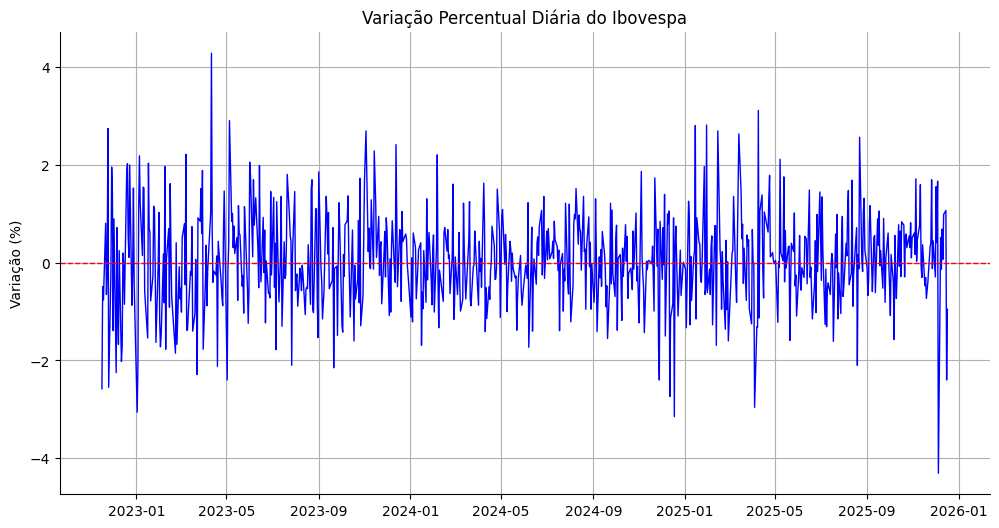

In [ ]:
# Gráfico exploratório série temporal

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ibovespa['Data'] = pd.to_datetime(ibovespa['Data'], format='%d.%m.%Y')

# Plotar série temporal da variação percentual
plt.figure(figsize=(12,6))
plt.plot(ibovespa['Data'], ibovespa['Var'], color='blue', linewidth=1)

# Personalizar o gráfico
plt.title('Variação Percentual Diária do Ibovespa')
plt.xlabel('')
plt.ylabel('Variação (%)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # linha de referência no zero
plt.grid(True)
sns.despine(top = True, right = True)
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


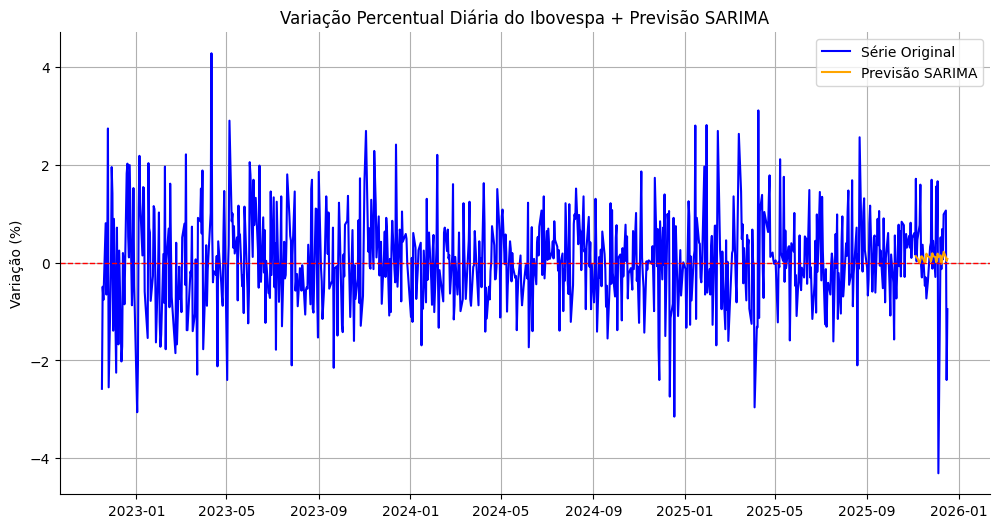

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Garantir que a coluna Data está em datetime
ibovespa['Data'] = pd.to_datetime(ibovespa['Data'], format='%d.%m.%Y')
ibovespa = ibovespa.set_index('Data')

# Ajustar modelo SARIMA simples (parâmetros podem ser otimizados)
model = SARIMAX(ibovespa['Var'], order=(1,1,1), seasonal_order=(1,1,1,5))
results = model.fit(disp=False)

# Fazer previsão para os últimos 30 dias
pred = results.get_prediction(start=-30)
pred_mean = pred.predicted_mean

# Plotar série original + previsão
plt.figure(figsize=(12,6))
plt.plot(ibovespa.index, ibovespa['Var'], color='blue', label='Série Original')
plt.plot(pred_mean.index, pred_mean, color='orange', label='Previsão SARIMA')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Variação Percentual Diária do Ibovespa + Previsão SARIMA')
plt.ylabel('Variação (%)')
plt.legend()
plt.grid(True)
sns.despine(top=True, right=True)
plt.show()

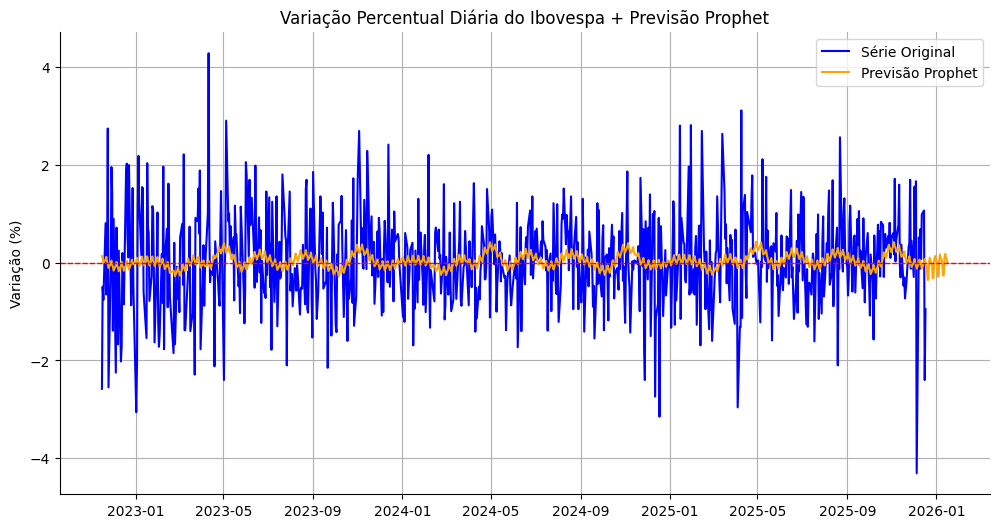

In [ ]:
from prophet import Prophet

# Preparar dados no formato esperado pelo Prophet
df_prophet = ibovespa.reset_index()[['Data','Var']]
df_prophet.columns = ['ds','y']

# Ajustar modelo Prophet
model = Prophet(daily_seasonality=True)
model.fit(df_prophet)

# Criar dataframe futuro para previsão (30 dias à frente)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Plotar série original + previsão
plt.figure(figsize=(12,6))
plt.plot(df_prophet['ds'], df_prophet['y'], color='blue', label='Série Original')
plt.plot(forecast['ds'], forecast['yhat'], color='orange', label='Previsão Prophet')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title('Variação Percentual Diária do Ibovespa + Previsão Prophet')
plt.ylabel('Variação (%)')
plt.legend()
plt.grid(True)
sns.despine(top=True, right=True)
plt.show()

In [ ]:
# 7. Cria novas colunas com informações derivadas (engenharia de atributos)
# Média móvel de 5 e 10 dias do fechamento do Ibovespa
ibov["ma_5"] = ibov["Ibovespa"].rolling(5).mean()
ibov["ma_10"] = ibov["Ibovespa"].rolling(10).mean()

# Retorno diário do Ibovespa (variação percentual)
ibov["ret_ibov"] = ibov["Ibovespa"].pct_change()

# Retorno diário do Brent e do Dólar
ibov["ret_brent"] = ibov["Brent"].pct_change()
ibov["ret_dolar"] = ibov["Dolar"].pct_change()

# Médias móveis
ibov["ma_brent_5"] = ibov["Brent"].rolling(5).mean()
ibov["ma_brent_10"] = ibov["Brent"].rolling(10).mean()

ibov["ma_dolar_5"] = ibov["Dolar"].rolling(5).mean()
ibov["ma_dolar_10"] = ibov["Dolar"].rolling(10).mean()

ibov["ma_vale_5"] = ibov["Vale"].rolling(5).mean()
ibov["ma_vale_10"] = ibov["Vale"].rolling(10).mean()

ibov["ma_sep_5"] = ibov["SeP"].rolling(5).mean()
ibov["ma_sep_10"] = ibov["SeP"].rolling(10).mean()

# Retornos diários. Para variáveis que representam preços de ativos ou índices:
ibov["ret_vale"] = ibov["Vale"].pct_change()
ibov["ret_sep"] = ibov["SeP"].pct_change()

# Risco: Volatilidade móvel (desvio padrão dos retornos em janelas):
ibov["vol_ibov_5"] = ibov["ret_ibov"].rolling(5).std()
ibov["vol_ibov_10"] = ibov["ret_ibov"].rolling(10).std()

ibov["vol_brent_5"] = ibov["ret_brent"].rolling(5).std()
ibov["vol_dolar_5"] = ibov["ret_dolar"].rolling(5).std()
ibov["vol_vale_5"] = ibov["ret_vale"].rolling(5).std()

In [ ]:
ibov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             774 non-null    datetime64[ns]
 1   Abertura         774 non-null    float64       
 2   Máxima           774 non-null    float64       
 3   Mínima           774 non-null    float64       
 4   Vol.             774 non-null    float64       
 5   Ibovespa         774 non-null    float64       
 6   Var              774 non-null    float64       
 7   MACD             749 non-null    float64       
 8   MACDh_12_26_9    741 non-null    float64       
 9   MACD_Sinal       741 non-null    float64       
 10  MACD_Cruzamento  774 non-null    int64         
 11  SMA100           675 non-null    float64       
 12  EMA100           675 non-null    float64       
 13  HiLo_High        762 non-null    float64       
 14  HiLo_Low         762 non-null    float64  

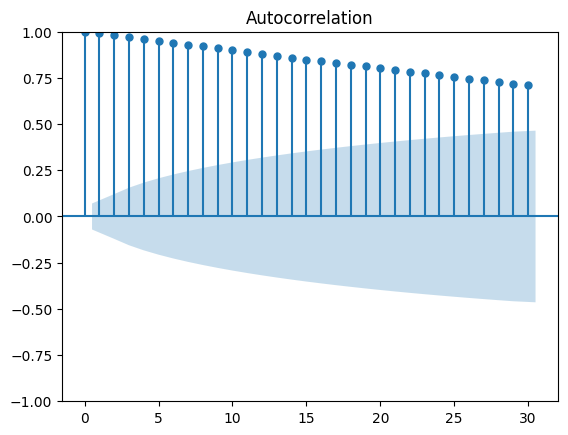

In [ ]:
# Verificar autocorrelação e correlação entre features
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Autocorrelação do Ibovespa
plot_acf(ibov['Ibovespa'].dropna(), lags=30)
plt.show()

# Interpretação

# - Eixo X (lags): representa o número de dias de defasagem. Lag 1 = ontem, Lag 2 = anteontem, etc.
# - Eixo Y: mostra o grau de correlação entre o valor atual e o valor defasado. Vai de -1 a +1.
# - Barra em Lag 0: sempre é 1.0, pois o valor está sendo comparado com ele mesmo.
# - Barras fora da faixa azul: são estatisticamente significativas. Indicam que há dependência temporal real.
# - Barras dentro da faixa azul: são estatisticamente insignificantes. Podem ser ruído

# - Os primeiros lags (1, 2, 3…) têm autocorrelação alta e positiva, o que indica persistência: o IBOVESPA tende a seguir a direção dos dias anteriores.
# - A autocorrelação vai diminuindo gradualmente, o que é típico de séries financeiras com tendência.
# - Isso sugere que incluir variáveis defasadas (como Ibovespa_t-1, ret_ibov_t-1) pode ajudar o modelo a capturar padrões temporais.
# - Logo, testar modelos que lidam bem com dependência temporal, como árvores de decisão, XGBoost.




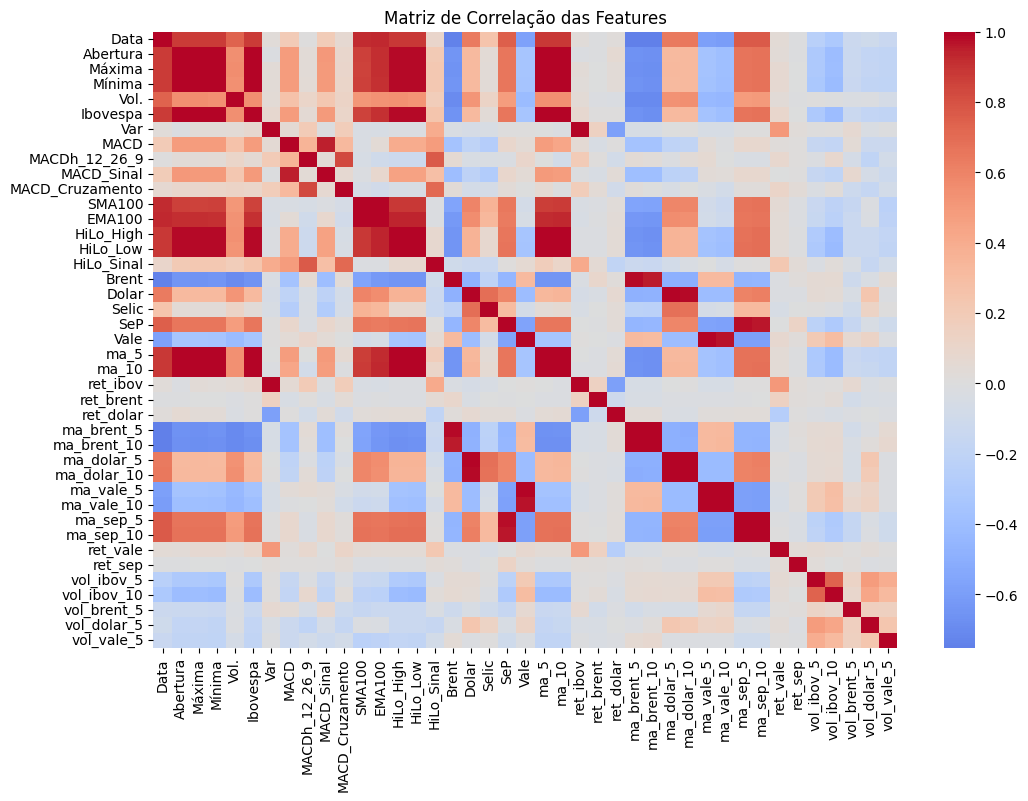

In [ ]:
# Correlação entre variáveis explicativas
corr = ibov.drop(columns=['ibov_alta']).corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação das Features")
plt.show()


In [ ]:
# Identificar pares altamente correlacionados

corr_matrix = ibov.corr()

# Definir o limiar (ex: 0.7)
threshold = 0.7
correlated_pairs = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j:
            if abs(corr_matrix.loc[i,j]) > threshold:
                correlated_pairs.append((i, j, corr_matrix.loc[i,j]))

# Remover duplicados (i,j) e (j,i)
unique_pairs = []
seen = set()
for i, j, val in correlated_pairs:
    if (j,i) not in seen:
        unique_pairs.append((i,j,val))
        seen.add((i,j))

# Printar os pares correlacionados
print("Variáveis altamente correlacionadas (>|0.7|):")
for i, j, val in unique_pairs:
    print(f"{i} - {j}: {val:.2f}")


Variáveis altamente correlacionadas (>|0.7|):
Data - Abertura: 0.88
Data - Máxima: 0.88
Data - Mínima: 0.88
Data - Vol.: 0.74
Data - Ibovespa: 0.88
Data - SMA100: 0.92
Data - EMA100: 0.93
Data - HiLo_High: 0.88
Data - HiLo_Low: 0.88
Data - Brent: -0.74
Data - SeP: 0.75
Data - ma_5: 0.88
Data - ma_10: 0.88
Data - ma_brent_5: -0.75
Data - ma_brent_10: -0.75
Data - ma_sep_5: 0.76
Data - ma_sep_10: 0.77
Abertura - Máxima: 1.00
Abertura - Mínima: 1.00
Abertura - Ibovespa: 1.00
Abertura - SMA100: 0.86
Abertura - EMA100: 0.91
Abertura - HiLo_High: 0.99
Abertura - HiLo_Low: 0.99
Abertura - ma_5: 1.00
Abertura - ma_10: 0.99
Máxima - Mínima: 1.00
Máxima - Ibovespa: 1.00
Máxima - SMA100: 0.86
Máxima - EMA100: 0.91
Máxima - HiLo_High: 0.98
Máxima - HiLo_Low: 0.98
Máxima - ma_5: 1.00
Máxima - ma_10: 0.99
Mínima - Ibovespa: 1.00
Mínima - SMA100: 0.86
Mínima - EMA100: 0.91
Mínima - HiLo_High: 0.98
Mínima - HiLo_Low: 0.98
Mínima - ma_5: 1.00
Mínima - ma_10: 0.99
Vol. - ma_brent_5: -0.70
Vol. - ma_bren

In [ ]:


# # Definir as variáveis de entrada (X) e a variável alvo (y)
# # X são as colunas que vamos usar para prever o comportamento do Ibovespa

# X = ibov[[
#     "Abertura", "Máxima", "Mínima", "Vol.", "Ibovespa", "Var",
#     "Brent", "Dolar", "Selic", "SeP", "Vale",
#     "ret_ibov", "ret_brent", "ret_dolar", "ret_vale", "ret_sep",
#     "vol_ibov_5", "vol_brent_5", "vol_dolar_5", "vol_vale_5"
# ]]

# # y é a variável que queremos prever: 1 se o Ibovespa subiu, 0 se caiu
# y = ibov["ibov_alta"]

# # Dividir os dados em treino e teste
# # Usamos todos os dias menos os últimos 30 para treinar, e os últimos 30 para testar
# X_train = X.iloc[:-30]
# X_test = X.iloc[-30:]
# y_train = y.iloc[:-30]
# y_test = y.iloc[-30:]

# # Criar e treinar o modelo de Random Forest
# # Esse modelo é bom para dados tabulares e não precisa de normalização
# modelo = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
# modelo.fit(X_train, y_train)

# # Previsões no conjunto de teste
# y_pred = modelo.predict(X_test)



In [ ]:
# # Avaliação do desempenho do modelo
# acuracia = accuracy_score(y_test, y_pred)
# print("🔍 Acurácia no último mês (30 dias):", round(acuracia * 100, 2), "%")
# print("\n📊 Relatório de classificação:")
# print(classification_report(y_test, y_pred))

# # Quais variáveis mais influenciaram o modelo
# print("\n📌 Importância das variáveis:")
# importancias = modelo.feature_importances_
# for nome, valor in zip(X.columns, importancias):
#     print(f"{nome}: {round(valor, 4)}")

🔍 Acurácia no último mês (30 dias): 100.0 %

📊 Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        18

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


📌 Importância das variáveis:
Abertura: 0.0018
Máxima: 0.0022
Mínima: 0.003
Vol.: 0.0022
Ibovespa: 0.0044
Var: 0.4783
Brent: 0.0034
Dolar: 0.0019
Selic: 0.0018
SeP: 0.0016
Vale: 0.0027
ret_ibov: 0.3885
ret_brent: 0.0058
ret_dolar: 0.0595
ret_vale: 0.0296
ret_sep: 0.0019
vol_ibov_5: 0.0038
vol_brent_5: 0.0029
vol_dolar_5: 0.0018
vol_vale_5: 0.0028


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Definir o alvo no futuro: prever se o IBOVESPA vai subir no dia seguinte
ibov['ret_ibov'] = ibov['Ibovespa'].pct_change()
ibov['ibov_alta_next'] = (ibov['ret_ibov'].shift(-1) > 0).astype(int)  # 1 se subir amanhã

# 2. Selecionar variáveis explicativas (features) que não sejam proxies diretos do alvo
# Evitar Var, ret_ibov, MACD_Cruzamento, HiLo_Sinal do mesmo dia
features = [
    "Abertura", "Máxima", "Mínima", "Vol.", "Ibovespa",
    "Brent", "Dolar", "Selic", "SeP", "Vale",
    "ret_brent", "ret_dolar", "ret_vale", "ret_sep",
    "vol_ibov_5", "vol_brent_5", "vol_dolar_5", "vol_vale_5"
]

# 3. Aplicar shift(+1) nas features: usar apenas dados disponíveis até ontem
X = ibov[features].shift(1)

# 4. Definir o alvo
y = ibov['ibov_alta_next']

# 5. Remover linhas com NaN geradas por shift e rolling
df = pd.concat([X, y], axis=1).dropna()
X = df[features]
y = df['ibov_alta_next']

# 6. Split temporal: últimos 30 dias como teste, o restante como treino
X_train = X.iloc[:-30]
X_test = X.iloc[-30:]
y_train = y.iloc[:-30]
y_test = y.iloc[-30:]

# 7. Treinar modelo Random Forest (sem necessidade de normalização)
#modelo = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
modelo = RandomForestClassifier(n_estimators=200, max_depth=5, class_weight='balanced', random_state=42)
modelo.fit(X_train, y_train)

# 8. Avaliar desempenho no conjunto de teste
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.57      1.00      0.72        17

    accuracy                           0.57        30
   macro avg       0.28      0.50      0.36        30
weighted avg       0.32      0.57      0.41        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
